# Iris Dataset Classification

# Load the data

In [3]:
import pandas as pd
data = pd.read_csv(r"C:\Users\hp\Downloads\iris.csv")
data.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# check null values

In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Dataset includes sepal and petal length/width measurements for different species. 

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

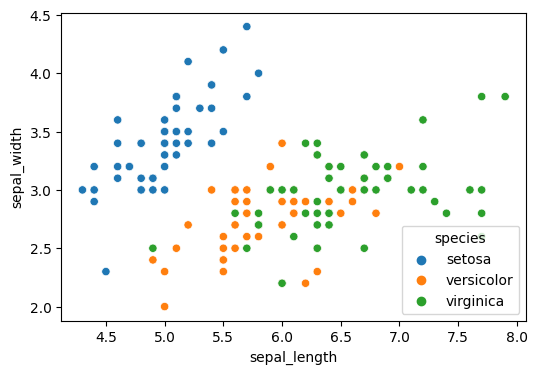

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='sepal_length',y='sepal_width',data = data,hue='species')
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

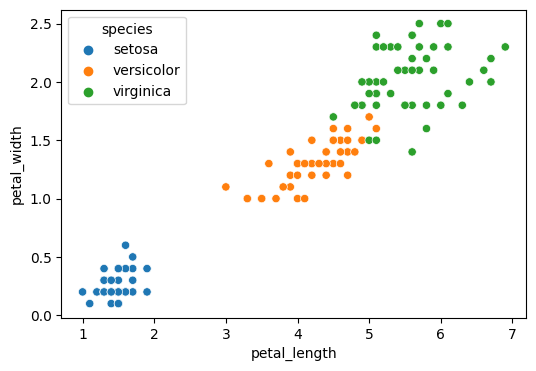

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='petal_length',y='petal_width',data = data,hue='species')
plt.plot

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

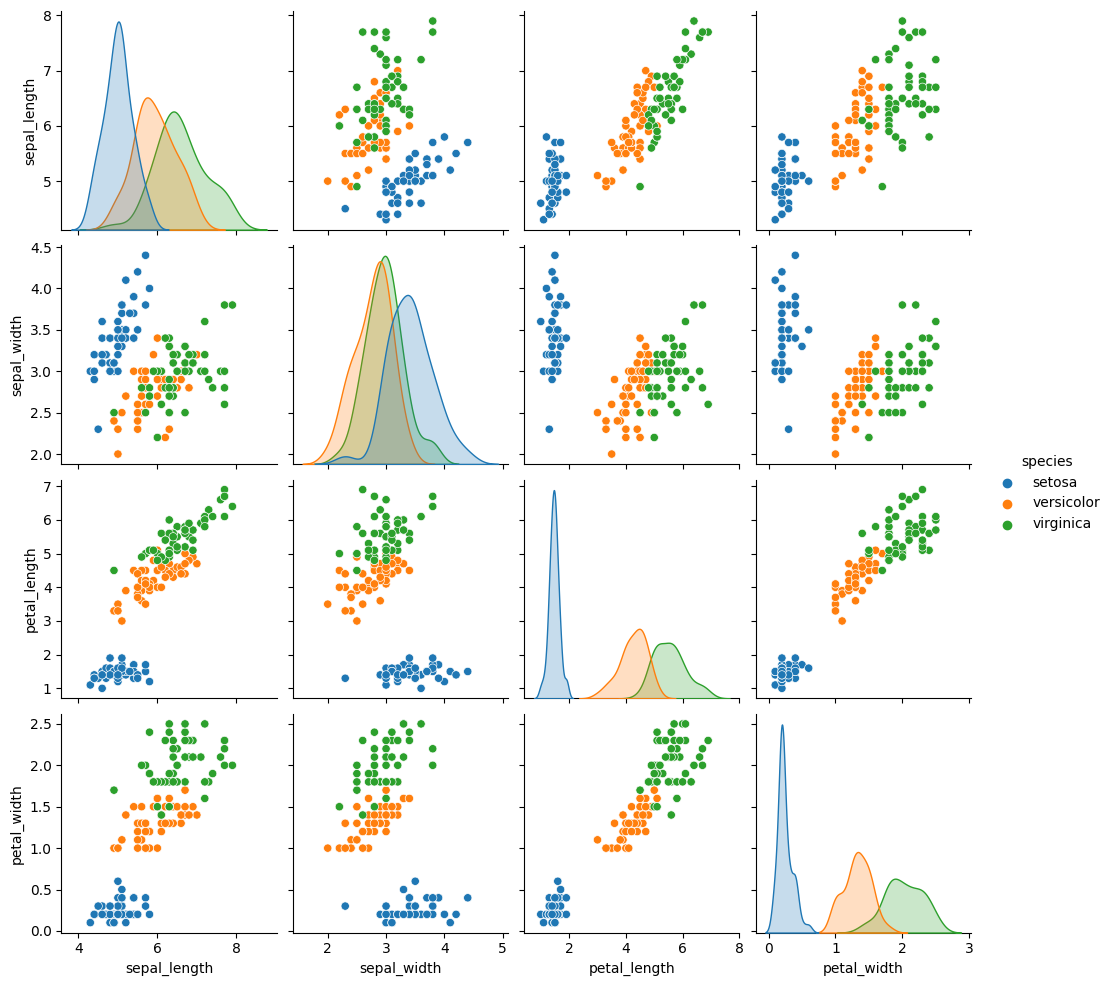

In [10]:
sns.pairplot(data,hue ='species' )
plt.plot

### Identify the most significant features influencing flower species classification.

In [12]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


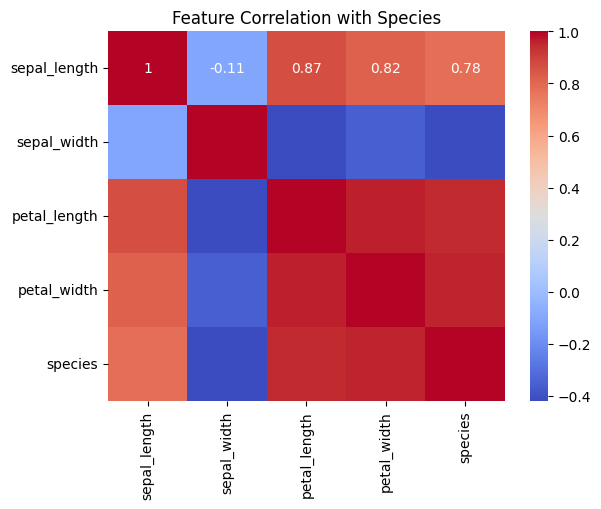

In [13]:
from sklearn.datasets import load_iris

# Add target (species) and encode it
iris = load_iris()
data['species'] = iris.target  # Already numeric (0, 1, 2)

# Correlation matrix
correlation_matrix = data.corr()

# Heatmap to visualize correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Species")
plt.show()

# Train and Split the data

In [21]:
x = data.iloc[:,:-1]
y = data['species']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [22]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

# Accuracy

In [25]:
print("testing accuracy is :",lr.score(x_train,y_train)*100)
print("training accuracy is :",lr.score(x_test,y_test)*100)

testing accuracy is : 97.5
training accuracy is : 100.0


In [27]:

# for example we take sepal_length,sepal_width,petal_length,petal_width respactivily 5.1,3.5,1.4,0.2 and it's species is setosa

lr.predict([[5.1,3.5,1.4,0.2]])


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

# Predict the input data

In [28]:
# 2nd example 
lr.predict([[6.5,3.0,5.2,2.0]])

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
0 → setosa

1 → versicolor

2 → virginica

###  Evaluate model performance using appropriate techniques

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score


In [30]:
y_pred = lr.predict(x_test)

In [31]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


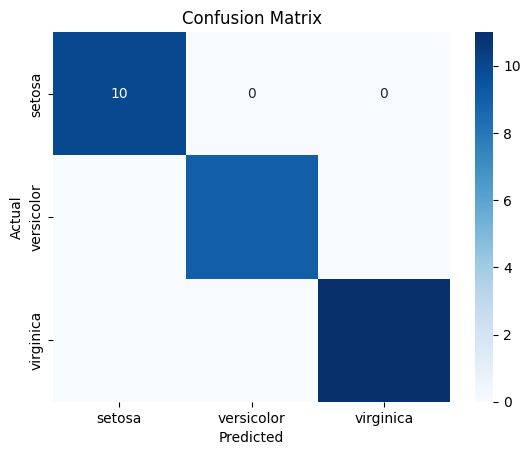

In [32]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues",fmt='d',xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [33]:
# Display Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Thank You!